### Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* 1 min

In [2]:
dt_signal_1 = np.load('workspace/old_data/k_ppg_signal_1.npy') # 1 min ppg

In [3]:
lb_list = np.load('workspace/old_data/k_ppg_lb.npy')

In [4]:
data = list(dt_signal_1)

In [5]:
df = pd.DataFrame(data)

In [6]:
label = list(lb_list)

In [7]:
df['label'] = label

In [8]:
df 
# label : -1 down, 0 norm , 1 up 
# 0 norm
# -1, 1, abnorm

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,label
0,25.309900,23.729900,22.940001,22.545000,22.545000,22.545000,24.124901,26.099800,29.259701,33.209499,...,50.193802,52.563702,55.328602,57.303501,58.488400,58.488400,58.488400,57.698502,56.513500,-1.0
1,59.278400,59.278400,59.673401,59.278400,58.488400,56.513500,54.538601,52.168701,49.008801,46.243999,...,43.084099,40.714199,39.134300,37.554298,35.974400,34.394501,33.209499,32.024601,30.444599,-1.0
2,49.008801,46.243999,43.479099,40.714199,39.134300,37.159401,35.579399,33.999500,32.814499,31.234600,...,28.864700,26.889799,26.099800,24.914900,24.124901,22.940001,22.150000,21.360001,20.965099,-1.0
3,33.209499,30.839600,30.444599,29.259701,28.074800,26.889799,26.494801,24.914900,24.124901,24.124901,...,23.334999,23.334999,22.940001,23.729900,24.914900,28.074800,31.234600,35.184399,39.529301,-1.0
4,28.074800,28.469700,28.469700,29.654699,30.444599,32.814499,35.974400,39.529301,43.874100,49.008801,...,31.234600,32.419601,35.184399,39.529301,44.269001,48.613899,53.353699,57.303501,60.068401,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,11.090500,9.115580,7.930630,11.485500,9.905540,7.930630,11.485500,9.510560,7.930630,10.695500,...,9.510560,7.140660,4.375780,9.115580,6.745680,4.375780,8.325610,8.720590,7.535650,0.0
584,9.510560,7.140660,9.905540,9.510560,7.930630,10.300500,9.510560,7.535650,10.300500,9.510560,...,8.720590,6.350700,8.720590,8.720590,12.275400,6.745680,9.510560,6.350700,9.510560,0.0
585,6.745680,8.720590,5.165750,6.745680,8.720590,5.165750,9.510560,8.720590,5.955710,7.535650,...,8.720590,8.720590,8.720590,7.140660,8.325610,7.535650,6.745680,6.350700,8.325610,0.0
586,47.033901,57.698502,68.362999,79.027496,85.742203,89.692101,88.507103,84.162300,73.497803,62.438301,...,30.444599,34.789501,38.739300,42.689098,46.638901,48.613899,50.193802,50.588799,49.798801,-1.0


In [9]:
df['label'].value_counts()

 0.0    513
-1.0     70
 1.0      5
Name: label, dtype: int64

* bandpass filter

In [10]:
from scipy.signal import butter
from scipy.signal import lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs # 50, fs:100 
    low = lowcut / nyq # 0.5/50 = 1/100, lowcut: 0.5
    high = highcut / nyq # 15/50 = 30/100, highcut : 15
    # order : frequency cut wave
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


# BPF setting 0.5 ~ 5 hz
lowcut = 0.5
highcut = 40

* ex

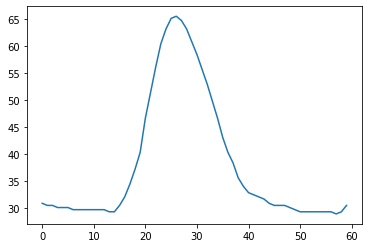

In [11]:
plt.plot(df[df['label'] == 0].iloc[0][:-1])

In [14]:
yy = butter_bandpass_filter(df[df['label'] == 0].iloc[0][:-1], lowcut, highcut, 100, order=5)

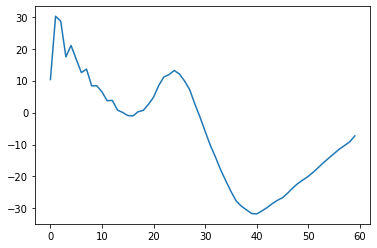

In [15]:
plt.plot(yy)

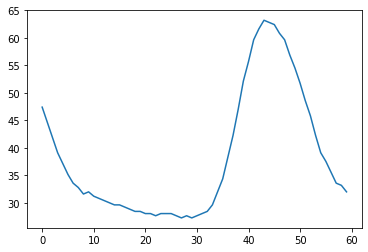

In [16]:
plt.plot(df[df['label'] == 0].iloc[1][:-1])

In [18]:
yy = butter_bandpass_filter(df[df['label'] == 0].iloc[1][:-1], lowcut, highcut, 100, order=5)

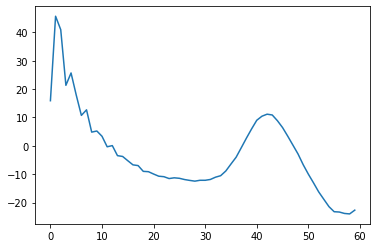

In [19]:
plt.plot(yy)

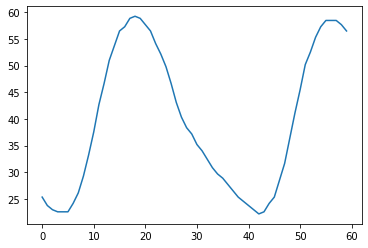

In [20]:
plt.plot(df[df['label'] == -1].iloc[0][:-1])

In [21]:
yy = butter_bandpass_filter(df[df['label'] == -1].iloc[0][:-1], lowcut, highcut, 100, order=5)

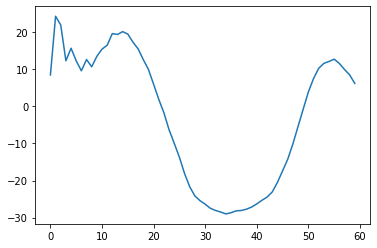

In [22]:
plt.plot(yy)

* filtering

In [23]:
dt_signal_1_bp = []
for i in dt_signal_1:
    yy = butter_bandpass_filter(i, lowcut, highcut, 100, order=5)
    dt_signal_1_bp.append(yy)

In [24]:
dt_signal_1

array([[25.30990028, 23.72990036, 22.94000053, ..., 58.48839951,
        57.69850159, 56.51350021],
       [59.27840042, 59.27840042, 59.67340088, ..., 33.20949936,
        32.02460098, 30.44459915],
       [49.00880051, 46.24399948, 43.47909927, ..., 22.14999962,
        21.36000061, 20.96509933],
       ...,
       [ 6.74567986,  8.72058964,  5.16575003, ...,  6.74567986,
         6.3506999 ,  8.32561016],
       [47.03390121, 57.69850159, 68.36299896, ..., 50.19380188,
        50.58879852, 49.79880142],
       [-3.12889004, -3.52386999, -3.12889004, ..., -3.12889004,
        -3.12889004, -3.12889004]])

In [25]:
dt_signal_1_bp

[array([  8.49026455,  24.33779536,  21.97421927,  12.32339521,
         15.70850142,  12.30399794,   9.61955601,  12.66329706,
         10.69534721,  13.52085805,  15.45720429,  16.50845083,
         19.65259506,  19.42769216,  20.18190614,  19.52418911,
         17.34835945,  15.52171156,  12.64241423,   9.97998407,
          5.98802851,   1.93600597,  -1.73338522,  -6.30129626,
         -9.95278036, -13.69981729, -18.10252169, -21.68663078,
        -24.15806294, -25.4459152 , -26.39030202, -27.49491674,
        -28.07622446, -28.50194761, -29.01490041, -28.70543715,
        -28.19099195, -28.08777107, -27.74146887, -27.16447374,
        -26.3131636 , -25.33474681, -24.47897175, -23.08576981,
        -20.53154861, -17.4015242 , -14.26025123, -10.14526787,
         -5.41858391,  -0.74682655,   3.89721579,   7.50934238,
         10.2686679 ,  11.61659205,  12.12563522,  12.75009746,
         11.60972824,   9.97407167,   8.52739839,   6.19920621]),
 array([ 19.88507643,  58.24297928,  5

### Autoencoder

In [26]:
import matplotlib.pyplot as plt


import numpy as np
import pandas as pd

import sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [27]:
data = list(dt_signal_1_bp)

In [28]:
label = list(lb_list)

In [29]:
df = pd.DataFrame(data)

In [30]:
df['label'] = label

In [31]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,label
0,8.490265,24.337795,21.974219,12.323395,15.708501,12.303998,9.619556,12.663297,10.695347,13.520858,...,7.509342,10.268668,11.616592,12.125635,12.750097,11.609728,9.974072,8.527398,6.199206,-1.0
1,19.885076,58.242979,55.854876,34.724845,41.308931,31.778667,21.909108,22.629221,10.580873,7.927895,...,-11.710135,-14.497242,-16.093007,-16.282066,-17.084576,-17.507533,-17.513211,-17.464335,-17.129347,-1.0
2,16.440115,47.225300,42.424831,22.254631,26.932106,19.218354,11.781103,13.401278,4.819504,4.516158,...,-23.708664,-23.115397,-23.045045,-22.324292,-21.151779,-20.548397,-19.508408,-18.397625,-17.155449,-1.0
3,11.140203,31.834438,28.756300,16.297374,19.989315,14.120696,9.411363,10.755724,4.197762,4.226813,...,-21.556957,-19.949502,-18.204759,-16.374188,-13.845817,-10.197752,-5.936201,-1.462597,2.855474,-1.0
4,9.417757,27.716885,26.778634,17.093676,21.356659,18.761191,16.980641,21.119269,19.031867,22.020904,...,-6.348602,-4.367951,-1.724983,1.691013,6.489061,10.622545,13.892707,17.215418,19.006241,-1.0


In [32]:
df['label'] = df['label'].map(lambda x : True if x == 0 else False)

* Remove NaN

In [33]:
df_drop = df.dropna()

In [34]:
raw_data_norm = df_drop.values

* Norm : for train

In [35]:
labels = raw_data_norm[:, -1]
data = raw_data_norm[:, 0:-1]

* train tune split

In [36]:
train_data, valid_data, train_labels, valid_labels = train_test_split(
    data, labels, test_size=0.3, random_state=21
)

In [37]:
print(train_data.shape, train_labels.shape, valid_data.shape, valid_labels.shape)

(406, 60) (406,) (174, 60) (174,)


In [38]:
valid_data, test_data, valid_labels, test_labels = train_test_split(
    valid_data, valid_labels, test_size=0.5, random_state=21
)

In [39]:
print(train_data.shape, train_labels.shape, valid_data.shape, valid_labels.shape, test_data.shape, test_labels.shape)

(406, 60) (406,) (87, 60) (87,) (87, 60) (87,)


In [41]:
# minmaxnormalization
min_tr = tf.reduce_min(np.float32(train_data))
# max
max_tr = tf.reduce_max(np.float32(train_data))
# min
min_val = tf.reduce_min(np.float32(train_data))
# min
max_val = tf.reduce_max(np.float32(train_data))

min_te = tf.reduce_min(np.float32(train_data))
# min
max_te = tf.reduce_max(np.float32(train_data))

In [42]:
train_data = (train_data - min_tr) / (max_tr - min_tr)
valid_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_te) / (max_te - min_te)

train_data = tf.cast(train_data, tf.float32)
valid_data = tf.cast(test_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

* train only norm

In [43]:
train_only_data = []
train_only_label = []
for dt, lb in zip(train_data, train_labels):
    if lb == True:
        train_only_data.append(dt)
        train_only_label.append(lb)

In [44]:
train_only_data = tf.cast(train_only_data, tf.float32)

In [45]:
valid_only_data = []
valid_only_label = []
for dt, lb in zip(valid_data, valid_labels):
    if lb == True:
        valid_only_data.append(dt)
        valid_only_label.append(lb)

In [46]:
valid_only_data = tf.cast(valid_only_data, tf.float32)

In [47]:
len(train_only_data)

350

In [48]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()

    self.encoder = tf.keras.Sequential([
      layers.Dense(60, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu"),
      layers.Dense(4, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(8, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(60, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()


In [49]:
autoencoder.compile(optimizer='adam', loss='mae')

In [50]:
history = autoencoder.fit(train_only_data, train_only_data, 
          epochs=500, 
          batch_size=64,
          validation_data=(valid_only_data, valid_only_data),
          shuffle=True)

Epoch 1/500
6/6 [==============================] - 1s 14ms/step - loss: 0.1014 - val_loss: 0.0992
Epoch 2/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0997 - val_loss: 0.0970
Epoch 3/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0971 - val_loss: 0.0935
Epoch 4/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0930 - val_loss: 0.0877
Epoch 5/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0859 - val_loss: 0.0771
Epoch 6/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0748 - val_loss: 0.0704
Epoch 7/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0688 - val_loss: 0.0620
Epoch 8/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0618 - val_loss: 0.0565
Epoch 9/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0622

2022-11-25 03:09:09.839141: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


6/6 [==============================] - 0s 3ms/step - loss: 0.0568 - val_loss: 0.0525
Epoch 10/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0531 - val_loss: 0.0491
Epoch 11/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0505 - val_loss: 0.0468
Epoch 12/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0486 - val_loss: 0.0452
Epoch 13/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0474 - val_loss: 0.0444
Epoch 14/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0466 - val_loss: 0.0437
Epoch 15/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0461 - val_loss: 0.0433
Epoch 16/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0458 - val_loss: 0.0432
Epoch 17/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0456 - val_loss: 0.0429
Epoch 18/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0454 - val_loss: 0.0426
Epoch 19/500
6/6 [===============

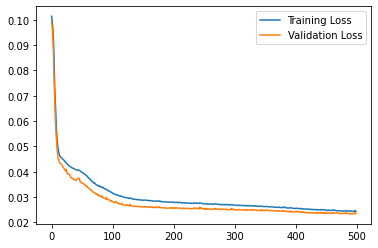

In [51]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

* valid

In [52]:
valid_ab_data = []
valid_ab_label = []
for dt, lb in zip(valid_data, valid_labels):
    if lb == False:
        valid_ab_data.append(dt)
        valid_ab_label.append(lb)

In [53]:
valid_ab_data = tf.cast(valid_ab_data, tf.float32)

* valid : Norm

In [54]:
encoded_imgs = autoencoder.encoder(valid_only_data).numpy()
# noral_test_data : latent vector
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

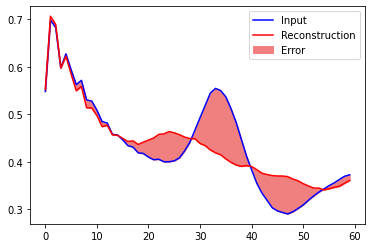

In [55]:
plt.plot(valid_only_data[0], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[0], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[0], valid_only_data[0], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

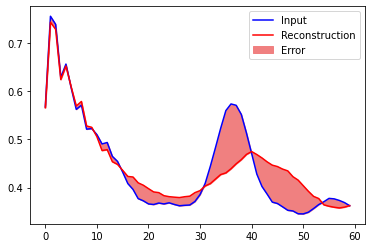

In [56]:
plt.plot(valid_only_data[1], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[1], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[1], valid_only_data[1], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

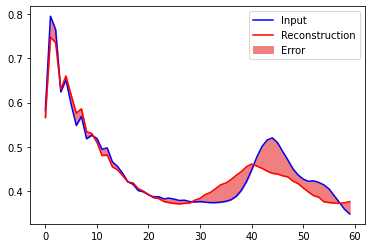

In [57]:
plt.plot(valid_only_data[2], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[2], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[2], valid_only_data[2], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

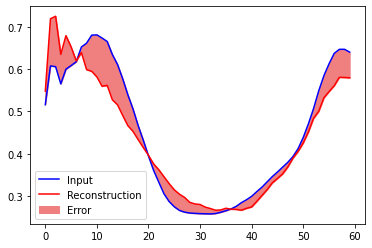

In [58]:
plt.plot(valid_only_data[33], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[33], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[33], valid_only_data[33], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

* valid : abnormal

In [59]:
encoded_imgs = autoencoder.encoder(valid_ab_data).numpy()
# noral_test_data를 encoder에 입력 : latent vector
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

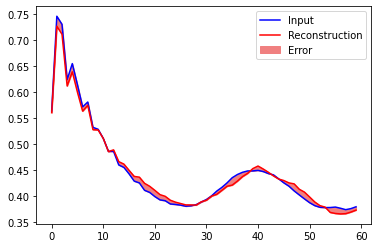

In [60]:
plt.plot(valid_ab_data[1], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[1], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[1], valid_ab_data[1], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

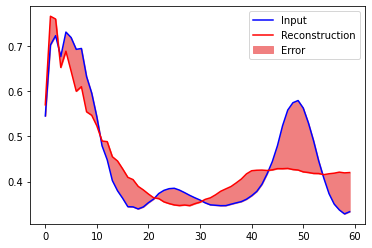

In [61]:
plt.plot(valid_ab_data[3], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[3], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[3], valid_ab_data[3], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

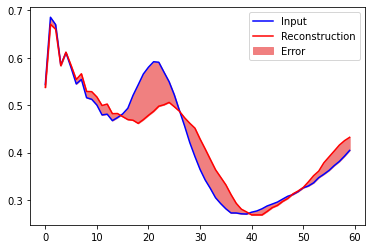

In [62]:
plt.plot(valid_ab_data[4], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[4], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[4], valid_ab_data[4], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

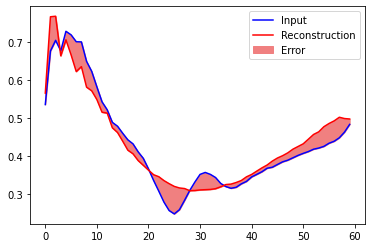

In [63]:
plt.plot(valid_ab_data[8], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[8], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[8], valid_ab_data[8], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

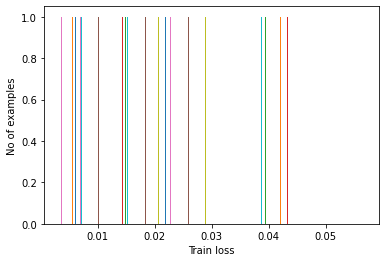

In [64]:
reconstructions = autoencoder.predict(valid_only_data)
test_loss = tf.keras.losses.mae(reconstructions, valid_only_data)
# 정상데이터와 복원한 데이터의 mae

plt.hist(test_loss)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [65]:
threshold = np.mean(test_loss) + np.std(test_loss)
print("Threshold: ", threshold)

Threshold:  0.036964133


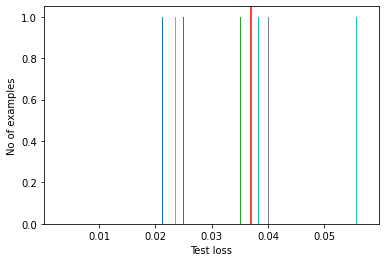

In [66]:
plt.hist(test_loss, bins=30)
plt.xlabel('Test loss')
plt.ylabel('No of examples')
plt.axvline(x=threshold, ymin=0.0, ymax=80, c='red')

plt.show()


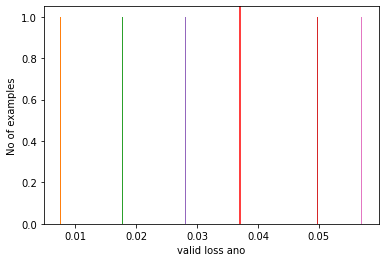

In [67]:
reconstructions_ano = autoencoder.predict(valid_ab_data)
# 비정상 데이터
valid_loss_ano = tf.keras.losses.mae(reconstructions_ano, valid_ab_data)
# 비정상 데이터와 그 복원 데이터의 mae

plt.hist(valid_loss_ano, bins=30)
plt.xlabel('valid loss ano')
plt.ylabel('No of examples')
plt.axvline(x=threshold, ymin=0.0, ymax=80, c='red')

plt.show()

* test

In [68]:
test_data

<tf.Tensor: shape=(87, 60), dtype=float32, numpy=
array([[0.5480544 , 0.6978309 , 0.6826802 , ..., 0.3628198 , 0.36962807,
        0.37280864],
       [0.5675717 , 0.75588363, 0.7390826 , ..., 0.3733052 , 0.3688621 ,
        0.36239168],
       [0.5817659 , 0.79479694, 0.764853  , ..., 0.37494242, 0.35952735,
        0.3489756 ],
       ...,
       [0.55249035, 0.7143718 , 0.7046164 , ..., 0.4073583 , 0.42749324,
        0.45063445],
       [0.53829587, 0.67279685, 0.6675024 , ..., 0.50065935, 0.48873386,
        0.47806013],
       [0.5533773 , 0.7151958 , 0.70279306, ..., 0.35203582, 0.35971135,
        0.36840263]], dtype=float32)>

In [69]:
test_labels

array([True, True, True, True, True, True, True, True, True, True, True,
       True, False, True, True, False, False, True, True, True, True,
       True, True, False, True, True, True, True, True, True, True, True,
       True, True, True, True, True, True, True, True, True, True, True,
       True, False, False, True, True, True, True, False, True, True,
       True, True, True, False, False, True, True, True, False, True,
       True, True, True, True, True, True, True, True, True, True, True,
       True, True, True, True, True, True, True, True, True, True, True,
       True, True], dtype=object)

In [70]:
def predict(model, data, threshold):
    # model, data, threshold input
    reconstructions = model(data)
    loss = tf.keras.losses.mae(reconstructions, data)
    # mae
    return tf.math.less(loss, threshold)
    #  loss < threshold : Normal

In [71]:
def print_stats(preds, labels):
    print('Accuracy = {}'.format(accuracy_score(labels, preds)))
    print('Precision = {}'.format(precision_score(labels, preds)))
    print('Recall = {}'.format(recall_score(labels, preds)))
    print('F1 score = {}'.format(f1_score(labels, preds)))
    print('Confusion Matrix = {}'.format(confusion_matrix(labels, preds)))

In [72]:
reconstructions = autoencoder(test_data)
loss = tf.keras.losses.mae(reconstructions, test_data)

In [73]:
preds = predict(autoencoder, test_data, threshold)

In [74]:
preds = preds.numpy()

In [75]:
def bi2num(x):
    if x == True:
        return 1
    else:
        return 0

In [76]:
preds_ans = []
for i in preds:
    preds_ans.append(bi2num(i))

In [77]:
test_concat_label_ans = []
for i in test_labels:
    test_concat_label_ans.append(bi2num(i))

In [78]:
cf_matrix = confusion_matrix(test_concat_label_ans, preds_ans)

In [79]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

In [80]:
import seaborn as sns

<AxesSubplot:>

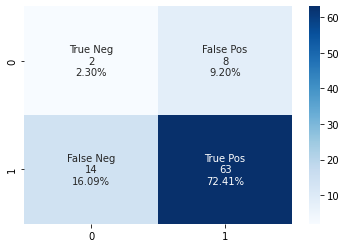

In [81]:
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

In [82]:
y_actu = pd.Series(test_concat_label_ans, name='Actual')
y_pred = pd.Series(preds_ans, name='Predicted')
df_confusion_margin = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=False)

: 

In [82]:
df_confusion_margin

Predicted,0,1,All
Actual,,,
0,1,9,10
1,8,69,77
All,9,78,87


In [83]:
print_stats(preds_ans, test_concat_label_ans)

Accuracy = 0.8045977011494253
Precision = 0.8846153846153846
Recall = 0.8961038961038961
F1 score = 0.8903225806451613
Confusion Matrix = [[ 1  9]
 [ 8 69]]


In [84]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_concat_label_ans, preds_ans)

0.498051948051948

: 